In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import glob
import numpy.ma as ma 
from tqdm import tqdm
import rasterio

In [2]:
#define the dataset
os.getcwd()
os.chdir("D:\\final thesis\\thesis_data\\canopy_water_storage\\cws\\2002\\")

In [75]:
#Uploading the Evapotranspiration image
input_file = r'May.tif'
ds = gdal.Open(input_file) 

In [76]:
# Dimensions
cols = ds.RasterXSize
rows = ds.RasterYSize
bands = ds.RasterCount
print(rows, cols, bands)

600 1440 1


In [77]:
#converting into array and remove the no data values
array = ds.GetRasterBand(1).ReadAsArray()
ndv=-9999
#ndv=array1[0][0]
#array1=np.arange(2480).reshape((40,62))         #to convert all the images in all folders to same shape
array=np.where(array==ndv,0,array)   ##set the nodata values equal to zero

In [78]:
np.min(array)

0.0

In [79]:
np.max(array)

0.5

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
(-180.0, 0.25, 0.0, 90.0, 0.0, -0.25)


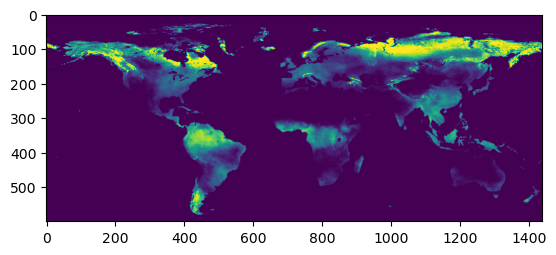

In [80]:
#plot the image
# array = ds.GetRasterBand(1).ReadAsArray()
plt.imshow(array)
print(ds.GetProjection())
print(ds.GetGeoTransform())

In [81]:

driver = gdal.GetDriverByName("GTiff")
out_ds = driver.Create("converted\converted_May.tif", cols, rows, 1, gdal.GDT_Float32)
out_ds.SetProjection(ds.GetProjection())
out_ds.SetGeoTransform(ds.GetGeoTransform())
band = out_ds.GetRasterBand(1)
band.WriteArray(array)
band.FlushCache()
band.ComputeStatistics(False)
band=None           #important,otherwise will return blank values
out_ds=None

In [82]:
ds1 = gdal.Open(r'converted\converted_May.tif')

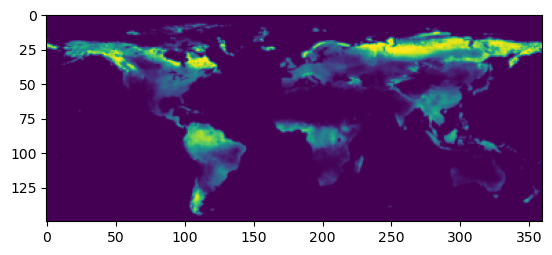

In [83]:
# Resampling to 1 degree with help of gdal_warp
if ds1 is not None:
    # perform warp operation
    dsRes = gdal.Warp("Resampled//MayR.tif", ds1, xRes=1, yRes=1, resampleAlg='bilinear')
    
    if dsRes is not None:
        # plot resampled image by converting it into an array
        band = dsRes.GetRasterBand(1)
        arr = band.ReadAsArray()
        plt.imshow(arr)
        plt.show()
    else:
        print("Error: Resampled dataset is None")
else:
    print("Error: Input dataset is None")